# Praca Domowa 6
## Maciej Gryszkiewicz

In [179]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy as cp

In [18]:
dataset = fetch_olivetti_faces()

In [25]:
print(dataset["DESCR"])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [38]:
df = pd.DataFrame(dataset["data"])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4096 entries, 0 to 4095
dtypes: float32(4096)
memory usage: 6.3 MB


Z opisu ramki danych wiemy że obrazki są wymiaru 64x64 pixele.

# Zawartość ramki danych

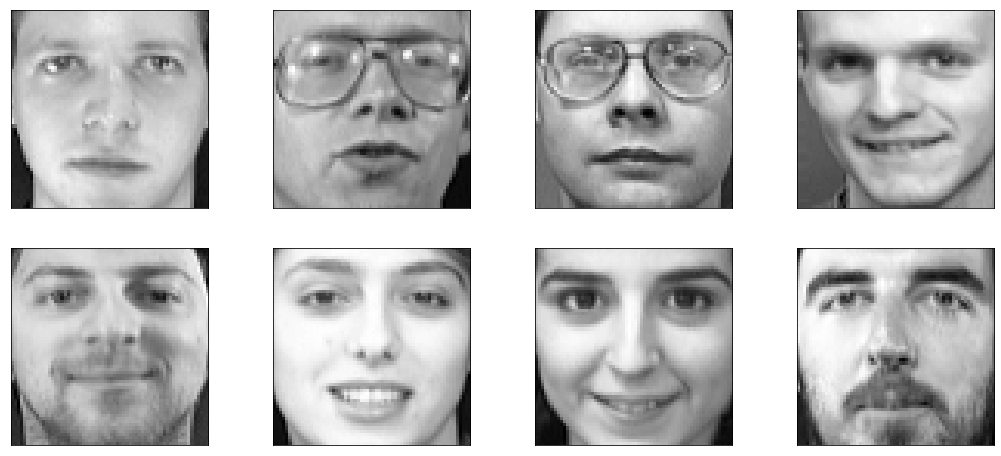

In [74]:
# plt.gray()
# plt.matshow(df.iloc[200].values.reshape(64, 64))

nrows, ncols = 2, 4
plt.figure(figsize=(18,8))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(df.iloc[i*15].values.reshape(64, 64))
    plt.xticks([]); plt.yticks([])
plt.show()

# PCA

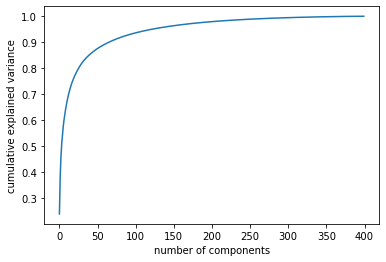

In [162]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum);
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Załóżmy że chcemy wyjaśniać 90% wyjściowej wariancji, dobierzmy więc odpowiednią liczbę komponentów.

In [159]:
for i in range(len(cumsum)):
    if cumsum[i] >= 0.90:
        print(f"Najmniejsza liczba komponentów do wyjaśnienia 90% wariancji to: {i+1}")
        break

Najmniejsza liczba komponentów do wyjaśnienia 90% wariancji to: 66


Jako, że informacje z 4096 pixeli skompresowaliśmy do 66 to stopień kompresji będzie wynosił $\dfrac{4096}{66} \approx  62$

# Kompresja

In [164]:
pca = PCA(n_components=66)
pca.fit(df)
df_compressed = pca.transform(df)

RMSE dla pary obrazków nr 1: 0.001813
RMSE dla pary obrazków nr 2: 0.001894
RMSE dla pary obrazków nr 3: 0.002476
RMSE dla pary obrazków nr 4: 0.001631
RMSE dla pary obrazków nr 5: 0.001869


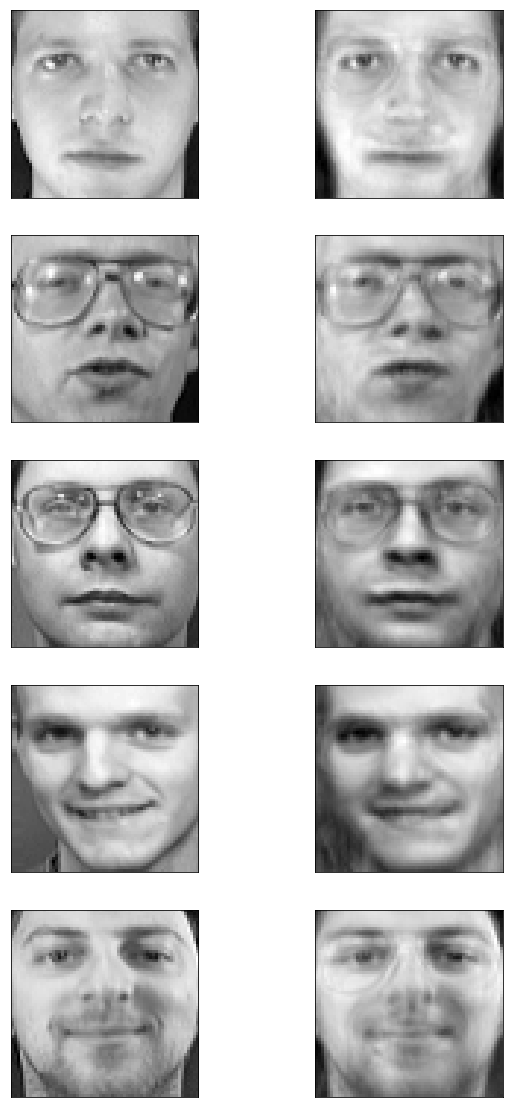

In [255]:
from sklearn.metrics import mean_squared_error

df_uncompressed = pca.inverse_transform(df_compressed)

nrows, ncols = 5, 2
plt.figure(figsize=(10,20))
plt.gray()
for i in range(5):
    ax = plt.subplot(nrows, ncols, i*2+1)
    ax.matshow(df.iloc[i*15].values.reshape(64, 64))
    plt.xticks([]); plt.yticks([])
    ax = plt.subplot(nrows, ncols, (i+1)*2)
    ax.matshow(df_uncompressed[i*15].reshape(64, 64))
    plt.xticks([]); plt.yticks([])
    print(f"RMSE dla pary obrazków nr {i+1}:" + " {:.6f}".format((mean_squared_error(df.iloc[i*15], df_uncompressed[i*15]))))

Oczywiście kompresja negatywnie wpływa na jakość obrazka. Co ciekawe, widać wpływ innych twarzy z ramki danych, np. wszystkie twarze posiadają zarys okularów, mimo że ich pierwotne, nieskompresowane odpowiedniki okularów nie mają. Twarze stają się bardziej 'uśrednione', zanikają unikalne cechy. Mimo tego, gdyby potasować te zdjęcia, bez problemu można by wskazać któro jest wersją skompresowaną którego. Jest to dosyć imponujące, jako że zmniejszyliśmy wielkość obrazka 62 krotnie.

# Modyfikacja obrazków

Ztworzyłem 4 dodatkowe zestawy obrazków: przyciemnione, rozjaśnione, w negatywie i obrócone do góry nogami.

In [217]:
df_dark = df.apply(lambda row: row.apply(lambda x: min(max(x - 0.5, 0), 1)), axis=1)

df_light = df.apply(lambda row: row.apply(lambda x: max(min(x + 0.5, 1), 0)), axis=1)

df_negative = df.apply(lambda row: row.apply(lambda x: 1-x), axis=1)

df_upside_down = df.apply(lambda row: row.iloc[::-1], axis = 1)

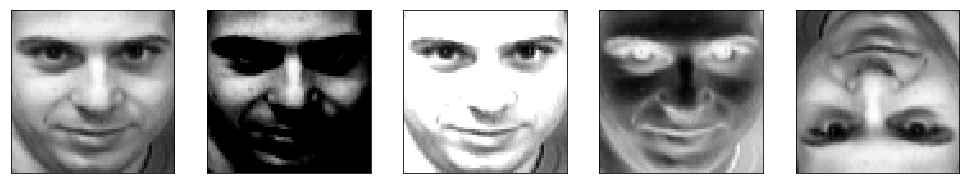

In [230]:
plt.figure(figsize=(17,30))
plt.gray()
plt.subplot(1, 5, 1).matshow(df.iloc[80].values.reshape(64, 64))
plt.xticks([]); plt.yticks([]);
plt.subplot(1, 5, 2).matshow(df_dark.iloc[80].values.reshape(64, 64))
plt.xticks([]); plt.yticks([]);
plt.subplot(1, 5, 3).matshow(df_light.iloc[80].values.reshape(64, 64))
plt.xticks([]); plt.yticks([]);
plt.subplot(1, 5, 4).matshow(df_negative.iloc[80].values.reshape(64, 64))
plt.xticks([]); plt.yticks([]);
plt.subplot(1, 5, 5).matshow(df_upside_down.iloc[80].values.reshape(64, 64))
plt.xticks([]); plt.yticks([]);

# Kompresja zmodyfikowanych obrazków

In [256]:
modified = [df_dark, df_light, df_negative, df_upside_down]
modified_compressed = []
modified_uncompressed = []

for data in modified:
    compressed = pca.transform(data)
    modified_compressed.append(compressed)
    modified_uncompressed.append(pca.inverse_transform(compressed))

In [282]:
def compare(before, after):
    og_rmse = []
    md_rmse = []
    nrows, ncols = 5, 2
    plt.figure(figsize=(8,15))
    plt.gray()
    for i in range(5):
        ax = plt.subplot(nrows, ncols, i*2+1)
        ax.matshow(before.iloc[i*15].values.reshape(64, 64))
        plt.xticks([]); plt.yticks([])
        ax = plt.subplot(nrows, ncols, (i+1)*2)
        ax.matshow(after[i*15].reshape(64, 64))
        plt.xticks([]); plt.yticks([])
        md_rmse.append(mean_squared_error(before.iloc[i*15], after[i*15]))
        og_rmse.append(mean_squared_error(df.iloc[i*15], after[i*15]))
    print(f"Mediana RMSE względem oryginału:      " + " {:.6f}".format(np.median(og_rmse)))
    print(f"Mediana RMSE względem zmodyfikowanego:" + " {:.6f}".format(np.median(md_rmse)))

Mediana RMSE względem oryginału:       0.223383
Mediana RMSE względem zmodyfikowanego: 0.002789


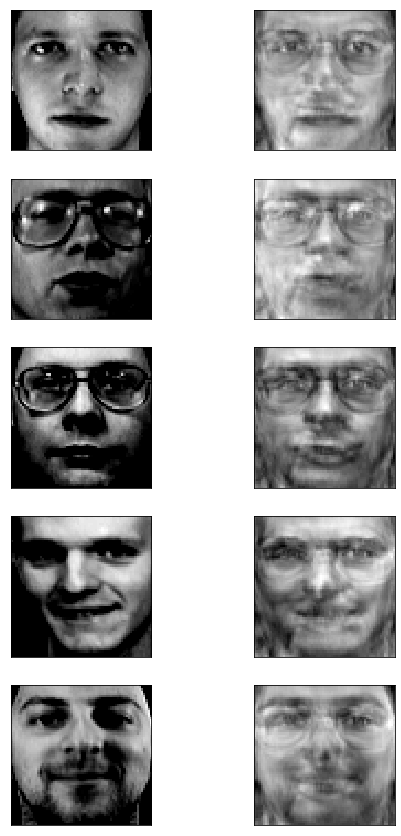

In [283]:
compare(modified[0], modified_uncompressed[0])

Mediana RMSE względem oryginału:       0.152701
Mediana RMSE względem zmodyfikowanego: 0.003618


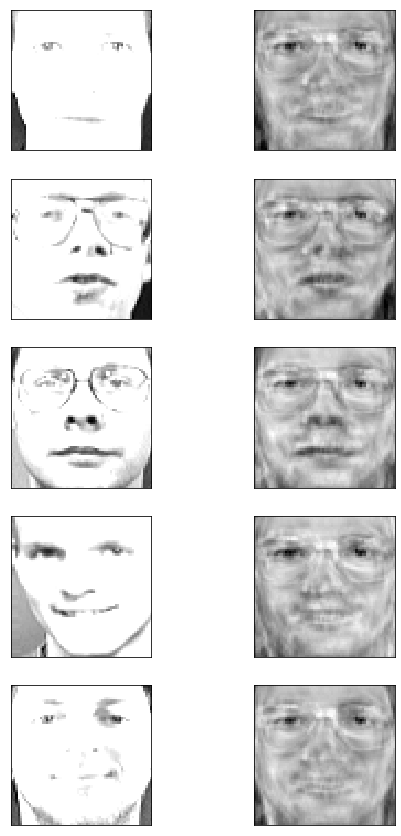

In [284]:
compare(modified[1], modified_uncompressed[1])

Mediana RMSE względem oryginału:       0.119220
Mediana RMSE względem zmodyfikowanego: 0.005307


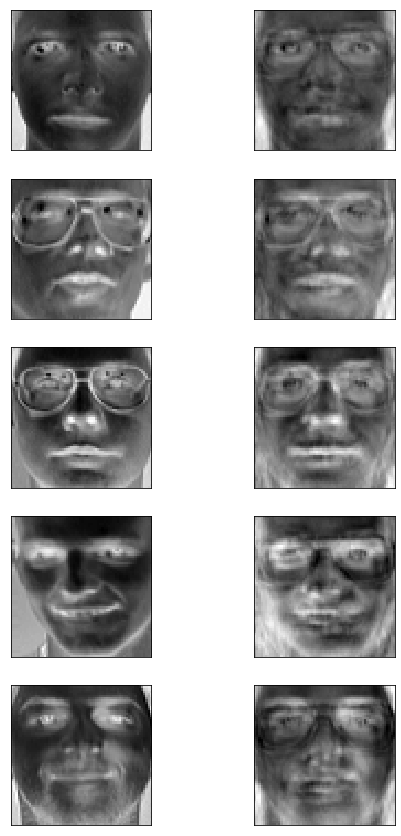

In [285]:
compare(modified[2], modified_uncompressed[2])

Mediana RMSE względem oryginału:       0.040308
Mediana RMSE względem zmodyfikowanego: 0.010127


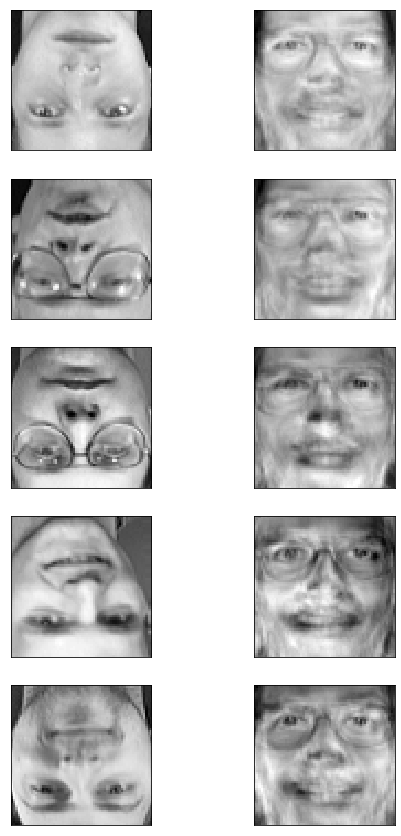

In [286]:
compare(modified[3], modified_uncompressed[3])

Powyższe przykłady pokazują, że PCA radzi sobie prawie tak samo dobrze przy dekompresji obrazów w których zmieniony został kolor jak przy dekompresji obrazów niemodyfikowanych. Wynika to z tego, że RMSe obu tych przypadków jest na bardzo podobnym poziomie. Sprawa ma się zupełnie inaczej w przypadku zdjęć obróconych do góry nogami. W tym wypadku RMSE jest o rząd wartości większe, PCA nie jest w stanie dobrze zdekompresować obróconych zdjęć. Co jednak bardzo ciekawe, zdjęcia które zostały obrócone a następnie zdekompresowane, są najbardziej zbliżone do zdjęć oryginalnych (charakteryzują się najniższą medianą RMSE względem zdjęcia oryginalnego).

Wygląda więc na to, że PCA może zostać wykorzystane do detekcji anomalii, np. możemy wykryć zdjęcia obrócone po wysokim RMSE względem wersji niezkompresowanej. Do tego, PCA mogłoby teoretycznie zostać użyte do rekonstrukcji zdjęcia oryginalnego w przypadku odwrócenia, w praktyce jednak nie wygląda to za dobrze (wszystkie zdjęcia zdekompresowane wyglądają niemalże identycznie, jak zlepke wszystkich twarzy z ramki danych).